# Flatiron Data Science Phase 1 Project

## **Author:** Madeleine Reiser
***

## Overview

This project used exploratory data analysis to help the business stake owners of a potential new movie streaming service figure out the best ways to make box office revenue. Datasets from IMDB and Box Office Mojo were analyzed to show what movies have made the most money, which are the highest rated, and which are the most popular, from the years 2010-2018. 

## Business Problem

Microsoft Stake Owners are interested in developing their own streaming service but aren’t sure what kinds of movies do the best in the box office. 


## Data Understanding

Using datasets from IMDB and Box Office Mojo, this project explores how box office revenue is correlated with variables such as ratings, popularity (which is measured by number of reviews left by viewers), specific studios and genres.  


## IMDB Ratings Dataset

Contains "tconst", which appears to be the code for each movie, the film's average rating, and the number of votes on IMDB

## IMDB Basic Dataset

Contains more information for each film on IMDB including "tconst" again, Primary and Original titles, start year, runtime in minutes, and the genre. 

## Box Office Mojo dataset

Contains the title, studio, domestic gross, foreign gross and year released according to data from Box Office Mojo 

## Data Modeling

I first created a correlation matrix to see which variables have a relationship with "Domestic Gross" or "Foreign Gross" 

### Notable Correlations:

Domestic Gross & Foreign Gross have a strong positive correlation of .83. This indicates that films that do well in the Domestic Box Office will do well in the Foreign Box Office.

Number of Votes & Domestic Gross have a moderate-strong positive correlation of .66. This means that more votes on IMDB tend to lead to a higher Domestic revenue.

The correlation between Number of Votes & Foreign Gross is a little weaker, at .56, but still notable.

Finally, Average Rating and Number of Votes have a mild positive correlation of .28, meaning that films with a higher rating can bring in more votes, or vice versa.

In [2]:
ax = plt.axes()
sns.set(font_scale = 1)
sns.heatmap(alljoined.corr(), ax = ax, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

ax.set_title('Correlation Matrix of Relevant Variables', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 13)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 13)


NameError: name 'plt' is not defined

This graph represents the mean Domestic Gross of the highest-grossing genres from 2010-2018. Adventure/Drama/Sport films blew the rest out of the water and made the most money at $400,700,000.

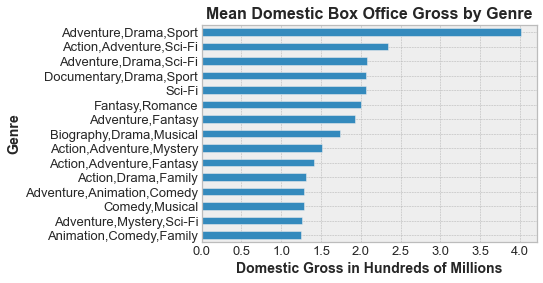

In [307]:
with plt.style.context('bmh'):
    (alljoined.groupby(['Genres'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Mean Domestic Box Office Gross by Genre', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in Hundreds of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 14, fontweight = 'bold') 
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    
# Adventure/Drama/Sport movies make an average of about $400 million in
# the domestic box office 



"Mean Domestic Gross by Genre for films with an 8+ Rating" displays that the average Domestic Gross for Action/Thriller movies with a high rating was $448,100,000.

In [1]:
with plt.style.context('bmh'):
    (alljoined_8_or_better.groupby(['Genres'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Mean Domestic Gross by Genre for films with an 8+ Rating', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of Millions', fontsize = 16, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 16, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

# Action/Thriller movies with an 8+ rating make an average of $450
# million
#means you can make a high-rated film and make the same 
# amount as Action/Drama/Sport



NameError: name 'plt' is not defined

"Mean Domestic Gross by Year" depicted the average Domestic Gross a film made for each year from 2010-2018. The year 2018 had the highest average Domestic Gross of $46,349,360. This number seemed low compared to the other graphs, but that's because the average was affected by low-grossing films.

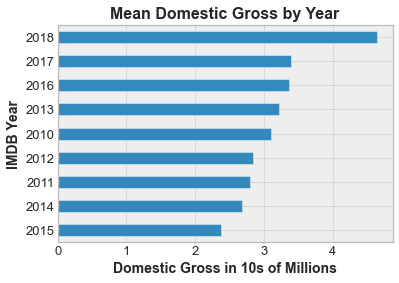

In [289]:
with plt.style.context('bmh'):
    (alljoined.groupby(['IMDB Year'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/10000000).plot(kind = 'barh')
    plt.title('Mean Domestic Gross by Year', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 10s of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('IMDB Year', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    
# the average DBO revenue for a movie in 2018 was ~$48 million,
# this number is lower than the mean per genre because it includes
# the lowest-grossing films as well



In [290]:
just2018 = alljoined[alljoined['IMDB Year'] == 2018]

"Mean Domestic Gross by Genre 2018" shows the average Domestic Gross a film from a certain genre(s) made in the year 2018. Again, Action/Adventure/Sci-fi makes the highest grossing films on average with a Domestic Gross of $412,300,000.

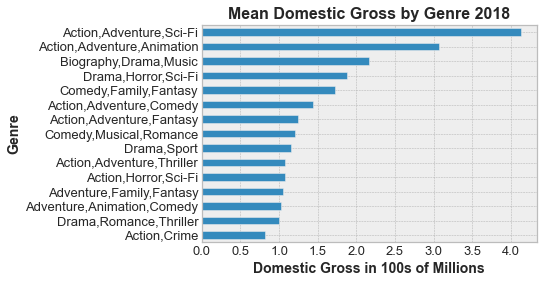

In [291]:
with plt.style.context('bmh'):
    (just2018.groupby(['Genres'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Mean Domestic Gross by Genre 2018', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
#Action/Adventure/Sci-fi yet again


I was interested in exploring which genres had the most movies with a "high rating", meaning an 8 or better on IMDB. The bar graph "Number of Movies per Genre with a rating of 8+ on IMDB" shows that Documentaries have the most movies with a rating of 8+ at 2715 films.

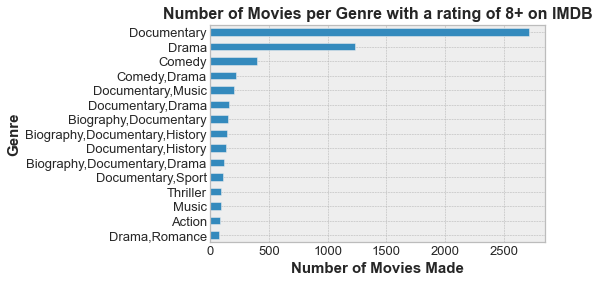

In [292]:
with plt.style.context("bmh"):
    imdb_8_or_better['Genres'].value_counts().head(15).plot(kind = 'barh')
    plt.title('Number of Movies per Genre with a rating of 8+ on IMDB', fontsize = 16, fontweight = 'bold')
    plt.xlabel('Number of Movies Made', fontsize = 15, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 15, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.gca().invert_yaxis()

#if you're after ratings and don't necessarily care about popularity or gross income
#number of votes should be considered for a better idea 


Because of the strong positive correlation between Number of Votes and Domestic Box Office Gross, I decided to explore which genres garnered the most votes. Again, Action/Adventure/Sci-fi had a giant lead with a total of 19,721,992 votes. Adventure/Animation/Comedy had 8,037,681 votes, and Action/Adventure/Comedy had 7,763,568.

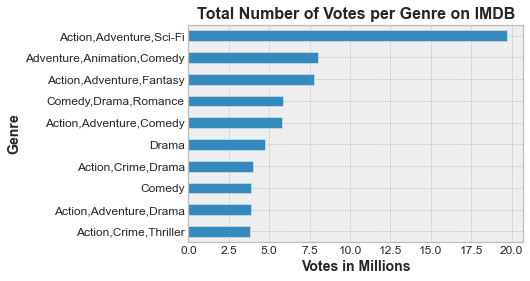

In [293]:
with plt.style.context('bmh'):
    (alljoined.groupby(['Genres'])['Number of Votes'].sum().sort_values(ascending = False).head(10)/1000000).plot(kind = 'barh')
    plt.title('Total Number of Votes per Genre on IMDB', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Votes in Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
#Action/Adventure/Sci-fi

I was interested in which production studios had the highest Domestic Box Office revenue, and which of their movies did best. I took the mean Domestic Gross for each studio rather than the sum, because an individual studio might not make many movies, or have a couple that did well. This gives a better idea of how much an individual film might make. 

"Mean Domestic Gross by Studio" determined that BV, P/DW and WB made the most money per film on average in the Domestic Box Office.

BV: $ 175,240,200

P/DW: $ 168,290,000

WB: $ 89,799,160

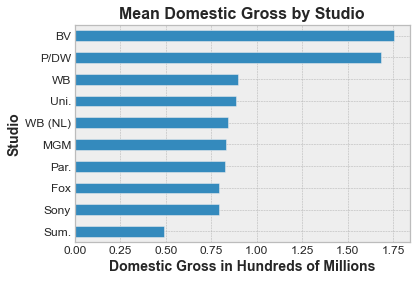

In [294]:
with plt.style.context('bmh'):
    (alljoined.groupby(['Studio'])['Domestic Gross'].mean().sort_values(ascending = False).head(10)/100000000).plot(kind = 'barh')
    plt.title('Mean Domestic Gross by Studio', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in Hundreds of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Studio', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

The top 3 studios that made the most money in the Domestic Box Office are BV, Paramount/Dreamworks, and WB. I created 3 separate dataframes to analyze each studio individually. I discovered that there were some duplicate titles for films, which led to outliers on the graphs, so I dropped them.  

In [295]:
BVonly = alljoined[alljoined['Studio']== 'BV']
PDWonly = alljoined[alljoined['Studio']== 'P/DW']
WBonly = alljoined[alljoined['Studio']== 'WB']

In [296]:
PDWonly.dropna()
WBonly.dropna()
BVonly.dropna()

,Title,Studio,Domestic Gross,Foreign Gross,tconst,Original Title,IMDB Year,Runtime (in minutes),Genres,Average Rating,Number of Votes
0,Toy Story 3,BV,415000000.0,652000000.0,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0
5,Tangled,BV,200800000.0,391000000.0,tt0398286,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366.0
11,Prince of Persia: The Sands of Time,BV,90800000.0,245600000.0,tt0473075,Prince of Persia: The Sands of Time,2010,116.0,"Action,Adventure,Fantasy",6.6,254975.0
31,The Sorcerer's Apprentice,BV,63200000.0,152100000.0,tt0963966,The Sorcerer's Apprentice,2010,109.0,"Action,Adventure,Family",6.1,143862.0
68,The Last Song,BV,63000000.0,26100000.0,tt1294226,The Last Song,2010,107.0,"Drama,Music,Romance",6.0,74914.0
...,...,...,...,...,...,...,...,...,...,...,...
2753,Ralph Breaks the Internet,BV,201100000.0,328100000.0,tt5848272,Ralph Breaks the Internet,2018,112.0,"Adventure,Animation,Comedy",7.1,85694.0
2757,Solo: A Star Wars Story,BV,213800000.0,179200000.0,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",7.0,226243.0
2763,Mary Poppins Returns,BV,172000000.0,177600000.0,tt5028340,Mary Poppins Returns,2018,130.0,"Comedy,Family,Fantasy",6.9,52103.0
2774,The Nutcracker and the Four Realms,BV,54900000.0,119100000.0,tt5523010,The Nutcracker and the Four Realms,2018,99.0,"Adventure,Family,Fantasy",5.5,18734.0


The 5 Highest Grossing BV movies are:

    Black Panther:                  $700,100,000
Avengers: Infinity War:         $678,800,000 
    Star Wars: The Last Jedi:       $620,200,000 
Incredibles 2:                  $608,600,000 
    Rogue One: A Star Wars Story    $532,200,000

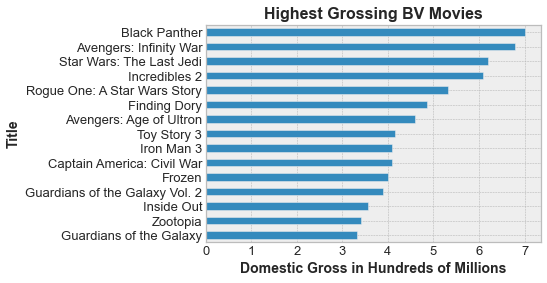

In [305]:
BVonly = BVonly.drop_duplicates(subset = 'Title')
        

with plt.style.context('bmh'):
    (BVonly.groupby(['Title'])['Domestic Gross'].sum().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Highest Grossing BV Movies', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in Hundreds of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Title', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    


The 5 Highest Grossing P/DW movies are:

    Transformers: Dark of the Moon:        $352,400,000
Shrek Forever After:                   $238,700,000 
    How to Train Your Dragon:              $217,600,000 
Madagascar 3: Europe's Most Wanted:    $216,400,000 
    Kung Fu Panda 2:                       $165,200,000

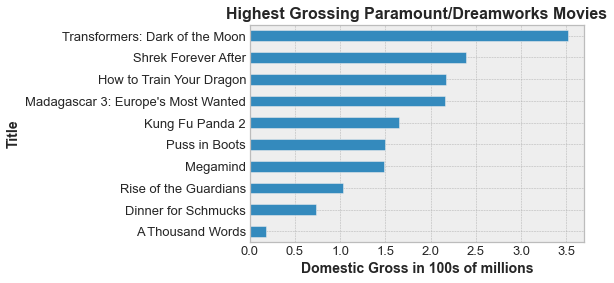

In [304]:
PDWonly = PDWonly.drop_duplicates(subset = 'Title')

with plt.style.context('bmh'):
    (PDWonly.groupby(['Title'])['Domestic Gross'].sum().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Highest Grossing Paramount/Dreamworks Movies', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Title', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    


The 5 Highest Grossing WB movies are:

    The Dark Knight Rises:              $448,100,000
Wonder Woman:                       $412,600,000 
    American Sniper:                    $350,100,000 
Aquaman:                            $335,100,000 
    Batman v Superman: Dawn of Justice: $330,400,000

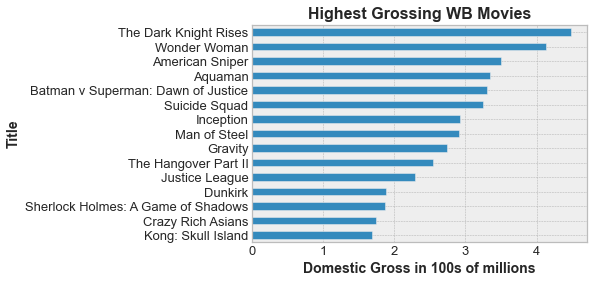

In [301]:
WBonly = WBonly.drop_duplicates(subset = 'Title')

with plt.style.context('bmh'):
    (WBonly.groupby(['Title'])['Domestic Gross'].sum().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Highest Grossing WB Movies', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Title', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)



## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***